In [42]:
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image
import torch
import imutils
from imutils.contours import sort_contours

In [59]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

C:\Users\jayes\anaconda3\envs\cheque_mgs\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jayes\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
chq1_payee = cv2.imread('./segmentation_op/cheque1/payee_seg.png')
chq2_payee = cv2.imread('./segmentation_op/cheque2/payee_seg.png')
chq3_payee = cv2.imread('./segmentation_op/cheque3/payee_seg.png')
chq4_payee = cv2.imread('./segmentation_op/cheque4/payee_seg.png')
chq5_payee = cv2.imread('./segmentation_op/cheque5/payee_seg.png')
chq6_payee = cv2.imread('./segmentation_op/cheque6/payee_seg.png')
chq7_payee = cv2.imread('./segmentation_op/cheque7/payee_seg.png')
chq8_payee = cv2.imread('./segmentation_op/cheque8/payee_seg.png')
chq9_payee = cv2.imread('./segmentation_op/cheque9/payee_seg.png')
chq10_payee = cv2.imread('./segmentation_op/cheque10/payee_seg.png')
chq11_payee = cv2.imread('./segmentation_op/cheque11/payee_seg.png')
chq12_payee = cv2.imread('./segmentation_op/cheque12/payee_seg.png')

In [24]:
def show_image(image):
    plt.figure(figsize = (15,5))
    plt.imshow(image,aspect='auto')

In [25]:
def find_draw_contours(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
    #print("Binary threshold image")
    #show_image(thresh)
    # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
    contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    image_copy = image.copy()
    cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
    #print("contoured image")
    show_image(image_copy)
    #print(hierarchy)
    return contours,hierarchy

In [60]:
def trocr_predict(img):
    pixel_values = processor(images=img, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

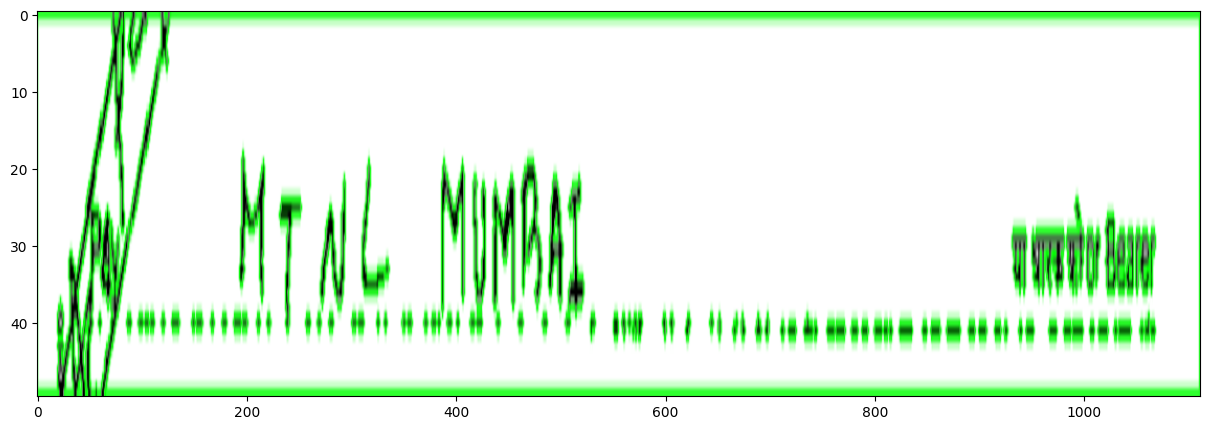

In [26]:
contours,hierarchy = find_draw_contours(chq1_payee)

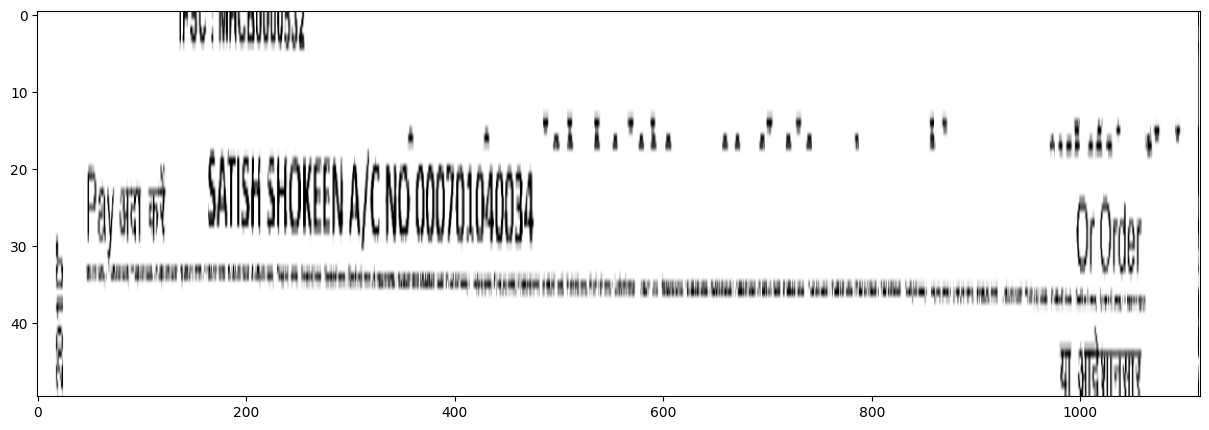

In [103]:
show_image(chq6_payee)

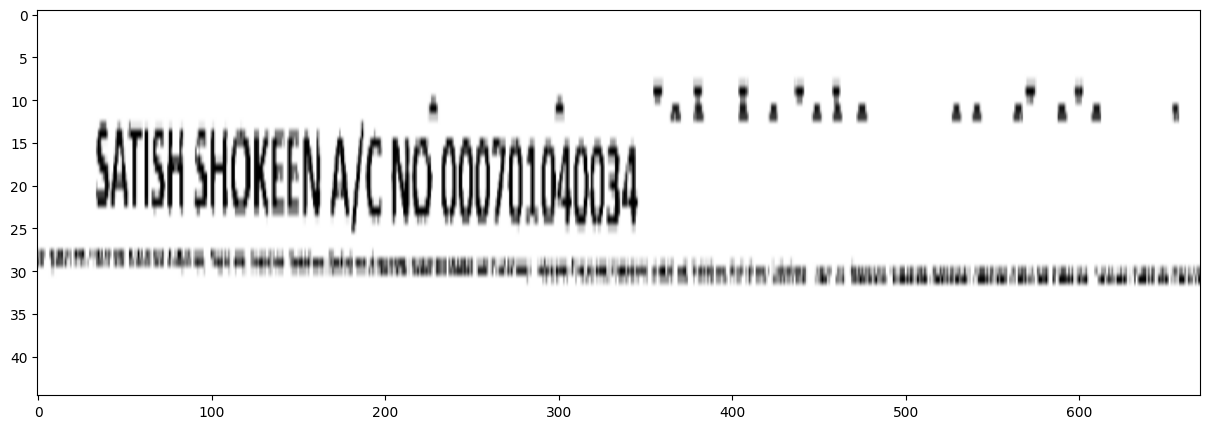

In [110]:
show_image(chq6_payee[5:50,130:800])

In [105]:
trocr_predict(chq6_payee)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'# PARAIN VOND 000000400400400400400000400000000000000000'

In [111]:
trocr_predict(chq6_payee[5:50,130:800])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'Satisfish SHOKEN AFC NO 00070,00034 "000'

In [88]:
img = chq9_payee.copy()

None


TypeError: object of type 'NoneType' has no len()

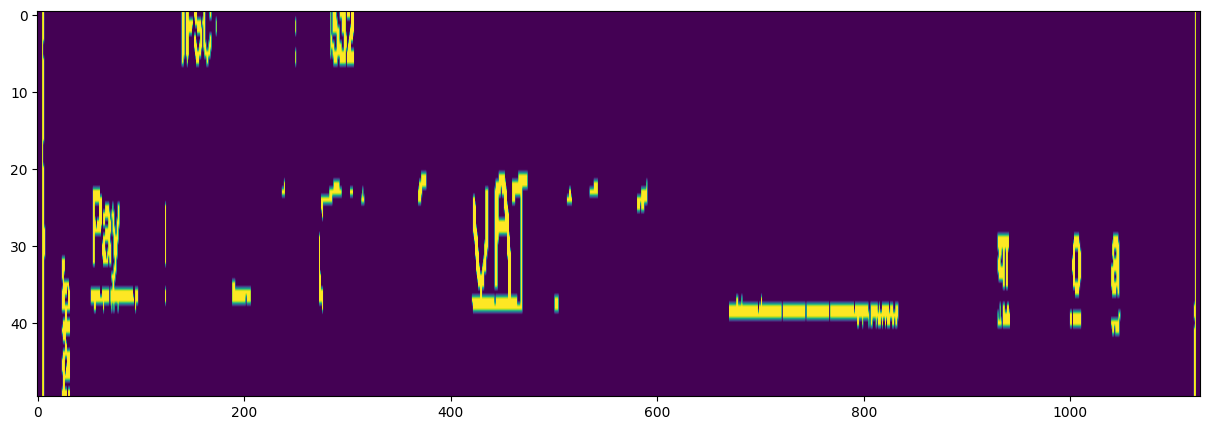

In [89]:
kernel1 = np.ones((3,5),np.uint8)
kernel2 = np.ones((9,9),np.uint8)

imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBW=cv2.threshold(imgGray, 230, 255, cv2.THRESH_BINARY_INV)[1]

img1=cv2.erode(imgBW, kernel1, iterations=1)
img2=cv2.dilate(img1, kernel2, iterations=3)
img3 = cv2.bitwise_and(imgBW,img2)
img3= cv2.bitwise_not(img3)
img4 = cv2.bitwise_and(imgBW,imgBW,mask=img3)
show_image(img4)

imgLines= cv2.HoughLinesP(img4,15,np.pi/180,10, minLineLength = 440, maxLineGap = 15)
print(imgLines)
for i in range(len(imgLines)):
    for x1,y1,x2,y2 in imgLines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imshow('Final Image with dotted Lines detected', img)